#**Project 09: Movie Rating Analysis (Seaborn)**
Author: Rohan Waghmare ||
Date: 22/08/2024

**ADVANCED VISUALIZATION MOVIE RATINGS**

###Importing essential libraries

In [1]:
import pandas as pd  # Import the pandas library and alias it as 'pd' for easy reference

import os  # Import the os module, which provides functions for interacting with the operating system

In [2]:
os.getcwd()  # Get the current working directory and return it as a string

'/content'

###Connect Google Colab to import CSV file

In [3]:
from google.colab import files
uploaded = files.upload()  # Opens a dialog to upload files

Saving Movie-Rating.csv to Movie-Rating.csv


In [14]:
import pandas as pd
rating = pd.read_csv("Movie-Rating.csv")
rating

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [15]:
len(rating)

559

In [16]:
rating.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [17]:
rating.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [19]:
type(rating)

pandas.core.frame.DataFrame

###Checking the versions of numpy & pandas

In [21]:
import numpy
import pandas
print(numpy.__version__)
print(pandas.__version__)

1.26.4
2.1.4


###Renaming Attributes & removing noise characters

In [18]:
rating.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [67]:
rating.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','BudgetMillions','Year']

In [68]:
rating.head() # removed spaces & % removed noise characters

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### After describe() function print columns which contain numerical values
- If you look at the year the data type is int but when you look at the mean value it showing 2009 which is meaningless
- We have to change to categroy type
- Also from object datatype we will convert to category datatypes

In [69]:
rating.describe()
# Provides summary statistics of the 'rating' column in a DataFrame

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [70]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


###Now I'm going to change the Dtype of the Attributes into the 'category' of:
- "Film",
- "Genre",
- "Year"

In [71]:
rating.Film = rating.Film.astype('category')

In [35]:
rating.Film

,Film
0,(500) Days of Summer
1,"10,000 B.C."
2,12 Rounds
3,127 Hours
4,17 Again
...,...
554,Your Highness
555,Youth in Revolt
556,Zodiac
557,Zombieland


In [72]:
rating.Genre = rating.Genre.astype('category')

In [36]:
rating.Genre

,Genre
0,Comedy
1,Adventure
2,Action
3,Adventure
4,Comedy
...,...
554,Comedy
555,Comedy
556,Thriller
557,Action


In [73]:
rating.Year = rating.Year.astype('category')

In [37]:
rating.Year

,Year
0,2009
1,2008
2,2009
3,2010
4,2009
...,...
554,2011
555,2009
556,2007
557,2009


In [74]:
rating.info() # successfully converted into category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [75]:
from matplotlib import pyplot as plt  # Import the pyplot module from Matplotlib for creating visualizations
import seaborn as sns  # Import the Seaborn library for enhanced data visualization based on Matplotlib
#%matplotlib inline  # Display plots inline in Jupyter Notebook (only needed if using Jupyter)
import warnings  # Import the warnings module to manage warning messages
warnings.filterwarnings('ignore')  # Suppress warnings to avoid cluttering the output

- Basically joint plot is a scatter plot & it find the relation b/w audiene & critics
- Also if you look up you can find the uniform distribution (critics)and normal distriution (audience)

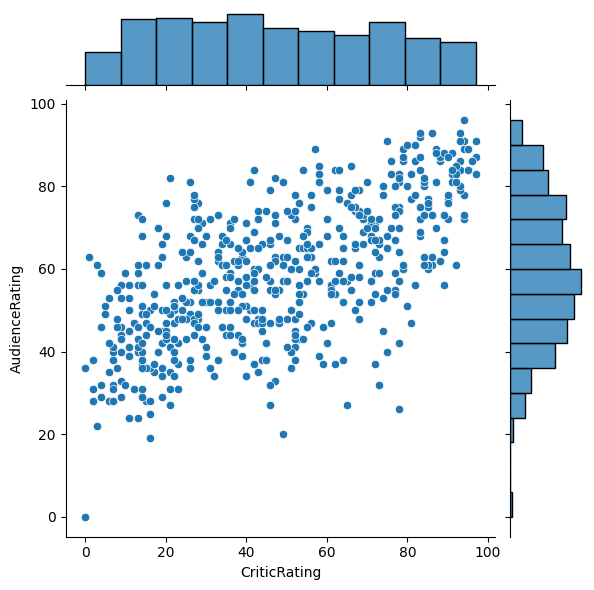

In [77]:
# Create a joint plot to visualize the relationship between Critic Rating and Audience Rating from the movies dataset
j = sns.jointplot(data=rating, x='CriticRating', y='AudienceRating')

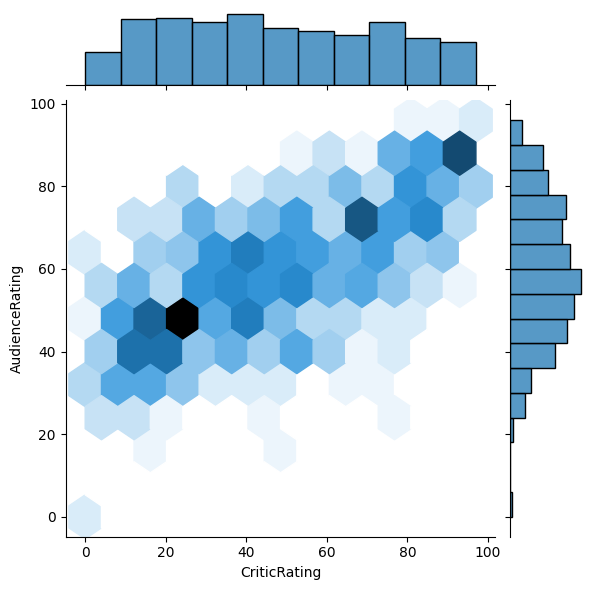

In [78]:
# Create a hexbin joint plot to visualize the relationship between Critic Rating and Audience Rating from the movie dataset
j = sns.jointplot(data=rating, x='CriticRating', y='AudienceRating', kind='hex')

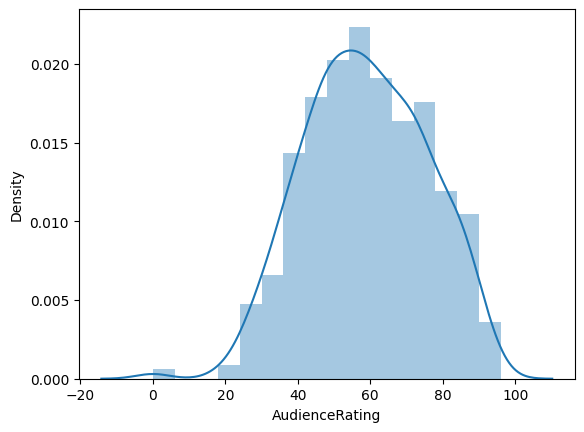

In [79]:
# Create a distribution plot to visualize the distribution of AudienceRating from the movies dataset
audi = sns.distplot(rating.AudienceRating)

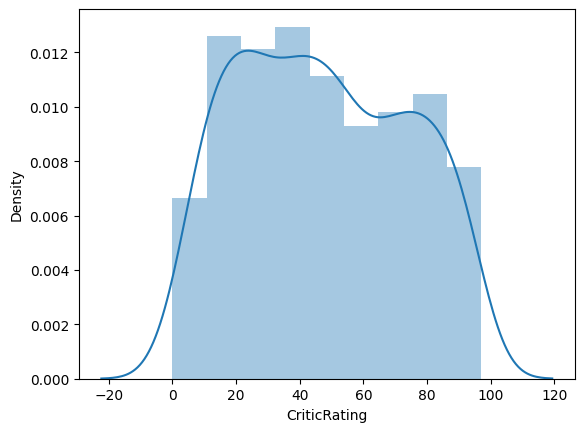

In [80]:
# Create a distribution plot to visualize the distribution of Critic Rating from the movies dataset
audi = sns.distplot(rating.CriticRating)

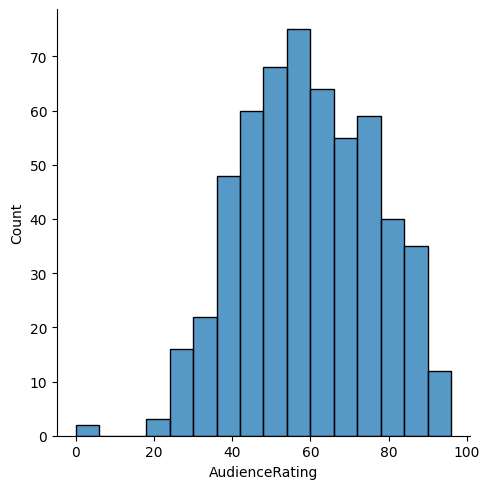

In [81]:
# For removing frequency line I have to add displot() instead of distplot()
# I used here displot()
audi = sns.displot(rating.AudienceRating)

### Here I added set_style() funtion

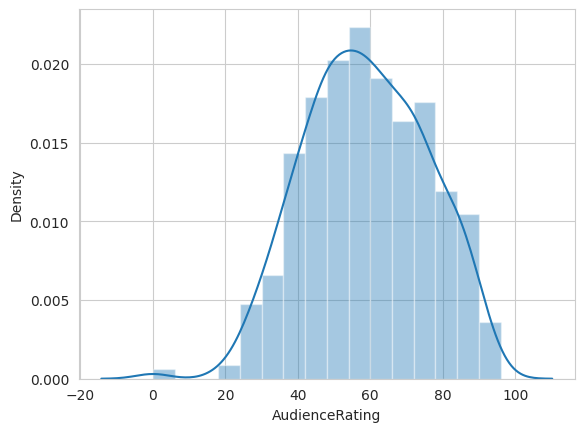

In [84]:
# The sns.set_style() function in Seaborn is used to set the style of the plots
sns.set_style('whitegrid')
audi = sns.distplot(rating.AudienceRating, bins = 16)

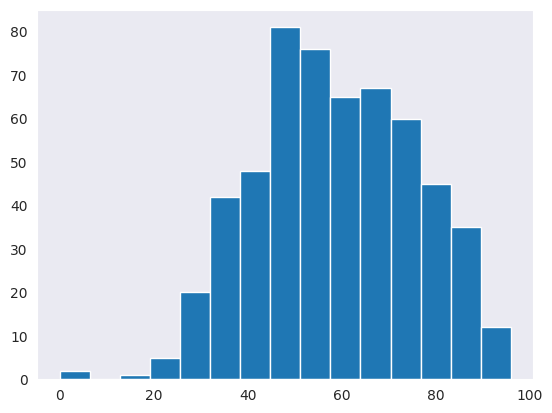

In [88]:
sns.set_style('dark')
audi = plt.hist(rating.AudienceRating, bins=15)
# Normal Distribution

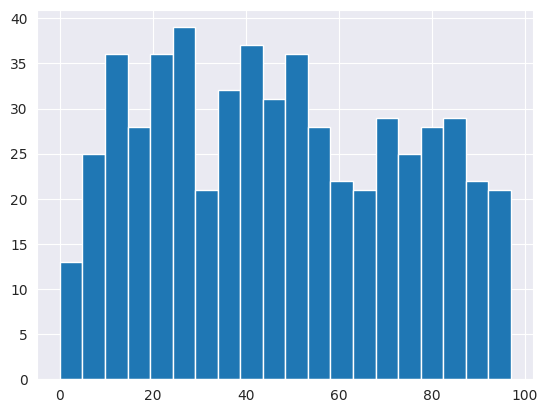

In [95]:
sns.set_style('darkgrid')
audi = plt.hist(rating.CriticRating, bins=20)
# Uniform Distribution

### Here I'm creating stacked Histograms:

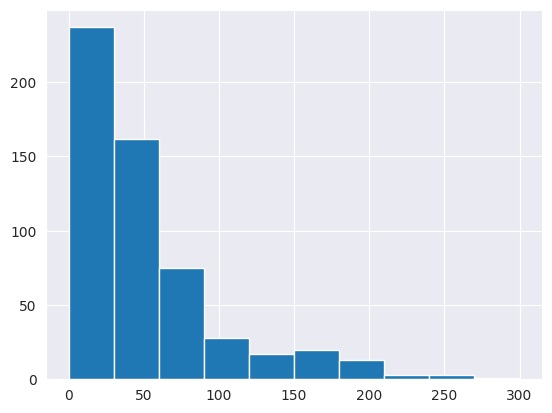

In [97]:
plt.hist(rating.BudgetMillions)  # Create a histogram to visualize the distribution of BudgetMillions from the movies dataset
plt.show()  # Display the histogram plot

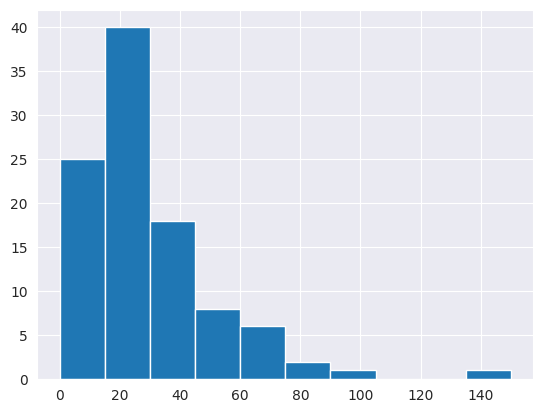

In [98]:
# It prints the budget of the Drama movies from dataset

plt.hist(rating[rating.Genre == 'Drama'].BudgetMillions)
plt.show()

###Here I gonna to show Scatter Plot

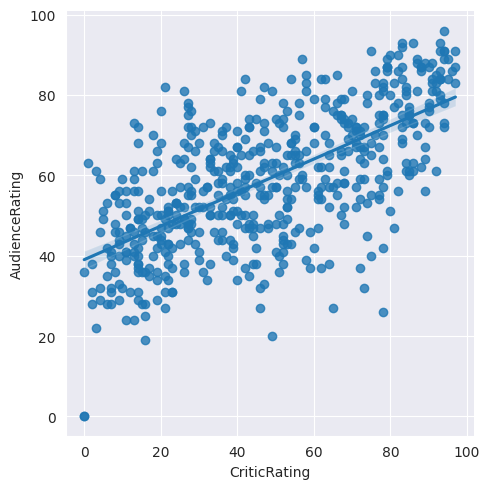

In [104]:
visual = sns.lmplot(data=rating, x='CriticRating', y='AudienceRating', fit_reg=True)

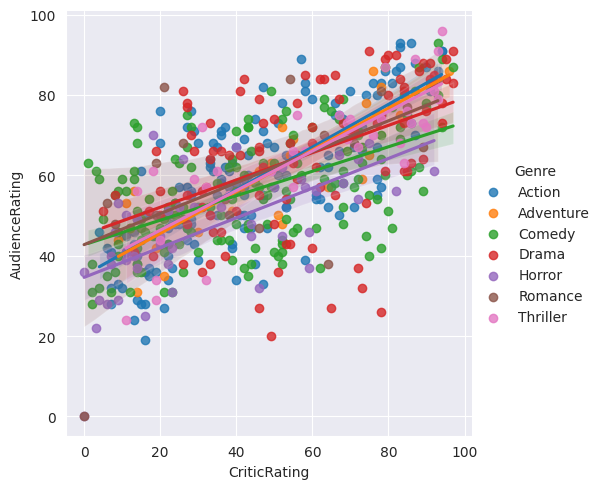

In [110]:
visual = sns.lmplot(data=rating, x='CriticRating', y='AudienceRating', fit_reg=True, hue = 'Genre')

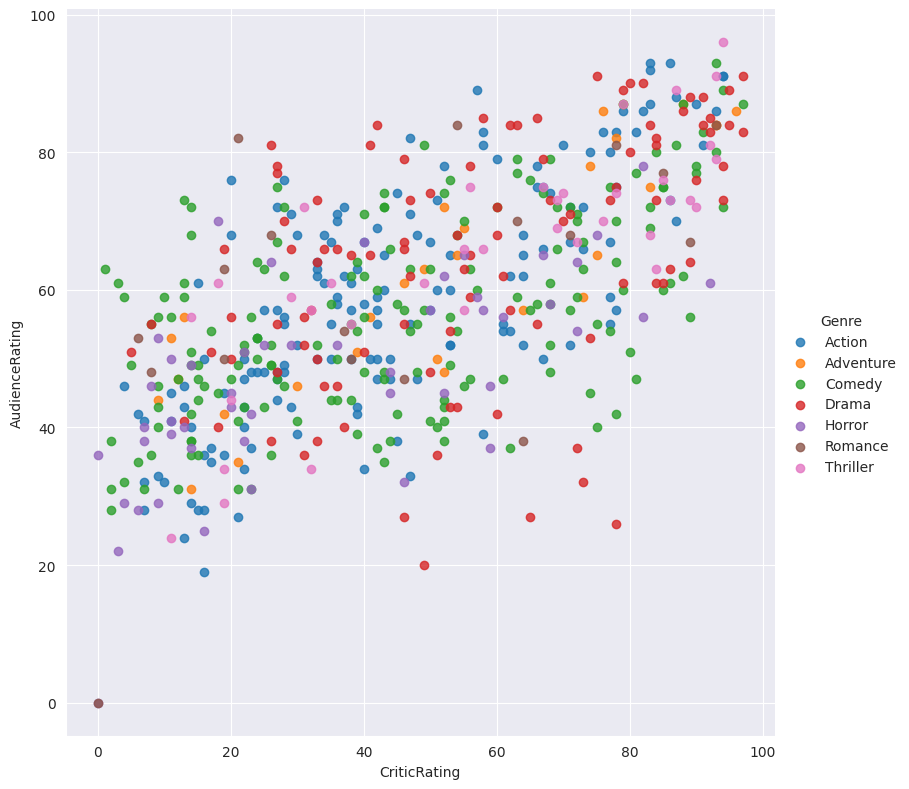

In [121]:
visual = sns.lmplot(data=rating, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=8, aspect=1)

### Here I'm going to use plt.subplot()
- Used to create multiple subplots within a single fig/graph
- Used in Grid Layout
- Used to compare in matrix format

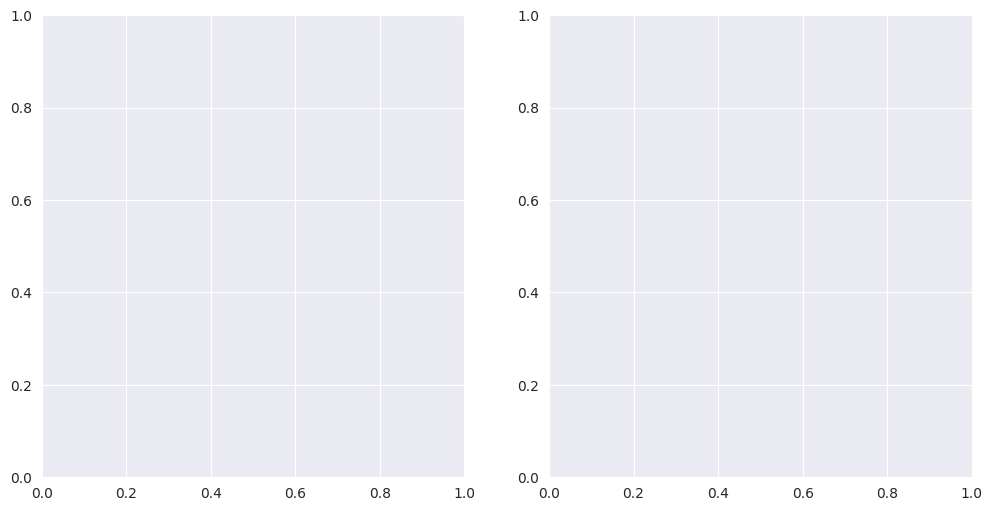

In [124]:
sub = plt.subplots(1,2, figsize =(12,6))

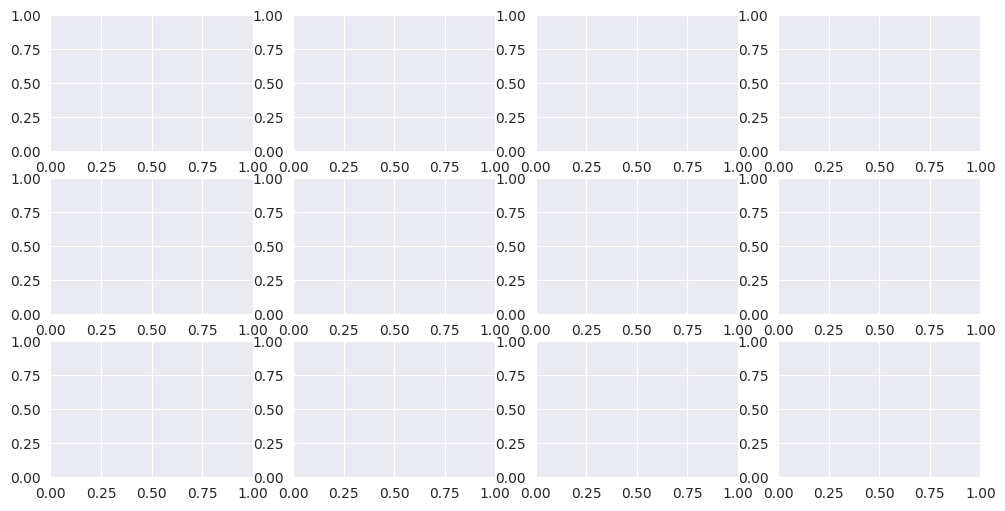

In [128]:
sub = plt.subplots(3,4, figsize =(12,6))

### Kernal Density Estimate Plot (KDE PLOT)
- Where do u find more density and how density is distibuted across from the the chat
- Center point is kernal this is calld KDE & insteade of dots it visualize like this
- We can able to clearly see the spread at the audience ratings

In [139]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


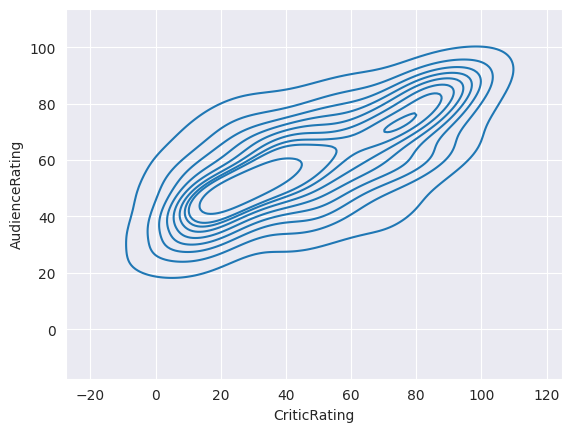

In [135]:
kernel = sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating)

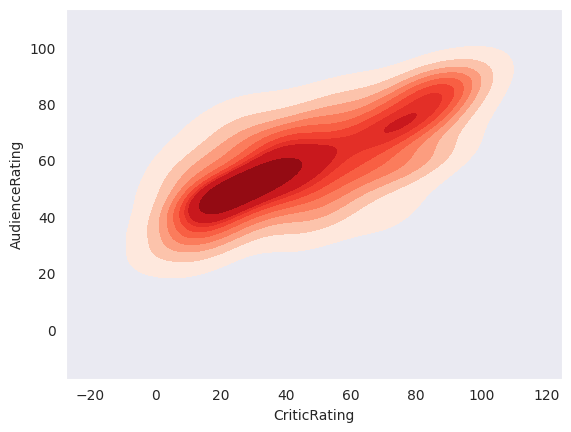

In [146]:
kernel = sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating,shade = True,shade_lowest=False,cmap='Reds')

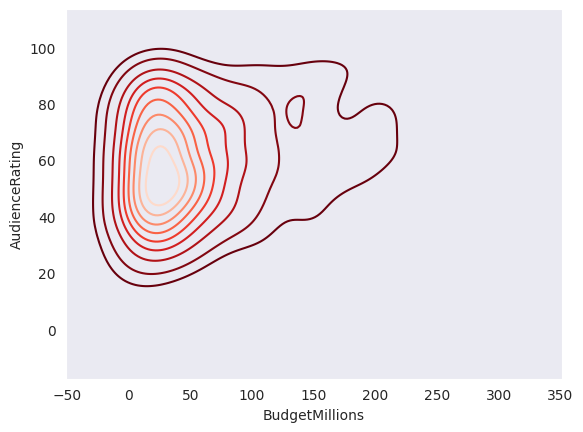

In [147]:
sns.set_style('dark')
kernel = sns.kdeplot(x = rating.BudgetMillions, y = rating.AudienceRating,shade_lowest=False,cmap='Reds_r')

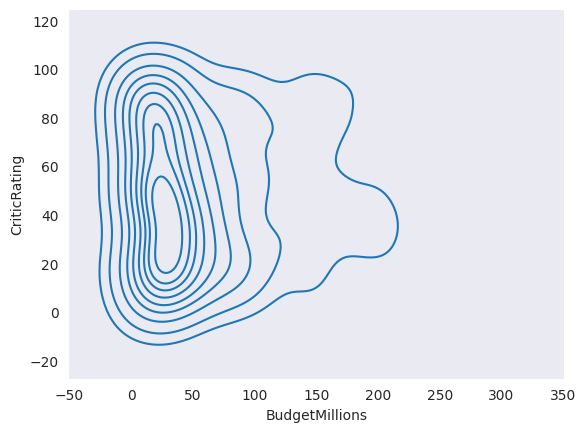

In [162]:
kernel = sns.kdeplot(x = rating.BudgetMillions, y = rating.CriticRating)

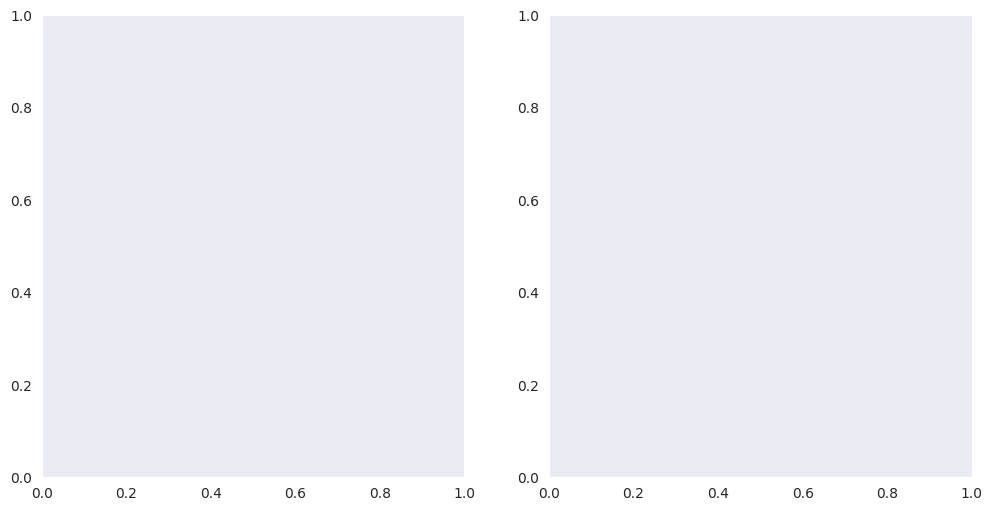

In [182]:
f, ax = plt.subplots(1,2, figsize =(12,6))

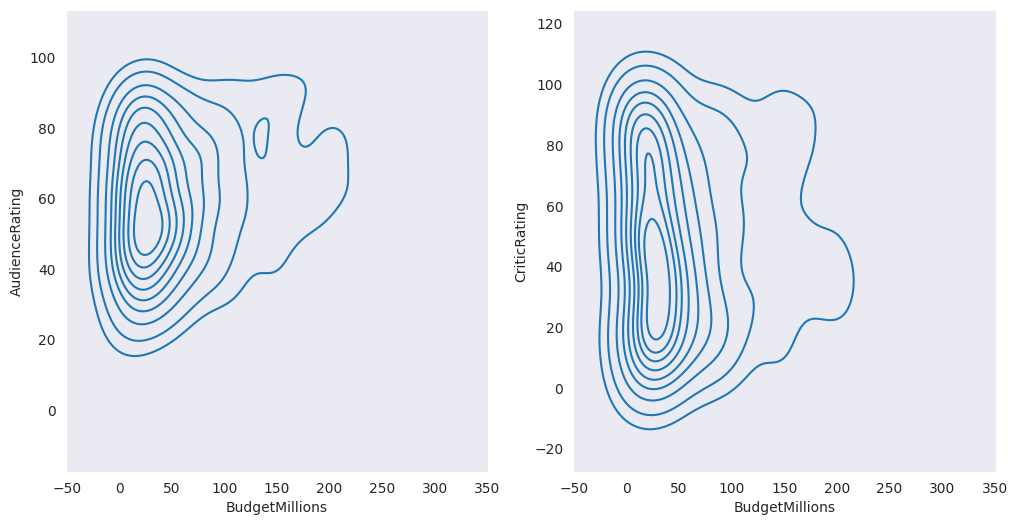

In [183]:
f, sub = plt.subplots(1,2, figsize =(12,6))

kernel = sns.kdeplot(x = rating.BudgetMillions, y = rating.AudienceRating, ax = sub[0])

kernel = sns.kdeplot(x = rating.BudgetMillions, y = rating.CriticRating, ax = sub[1])

### Plots are Stacked Histogram

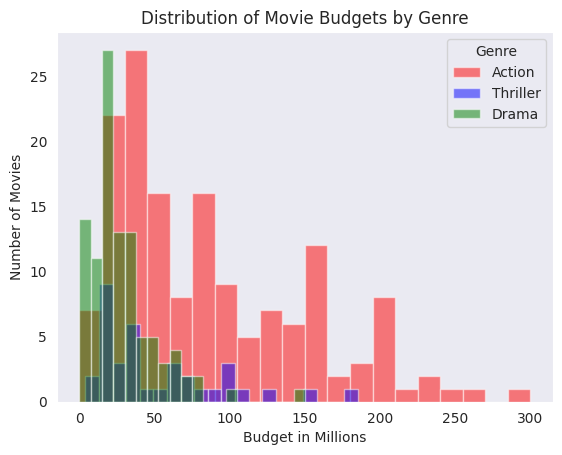

In [185]:
# Define colors for each genre
colors = {'Action': 'red', 'Thriller': 'blue', 'Drama': 'green'}

# Plot histograms for each genre
plt.hist(rating[rating.Genre == 'Action'].BudgetMillions, bins=20, alpha=0.5, color=colors['Action'], label='Action')
plt.hist(rating[rating.Genre == 'Thriller'].BudgetMillions, bins=20, alpha=0.5, color=colors['Thriller'], label='Thriller')
plt.hist(rating[rating.Genre == 'Drama'].BudgetMillions, bins=20, alpha=0.5, color=colors['Drama'], label='Drama')

# Add labels and title
plt.xlabel('Budget in Millions')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Budgets by Genre')

plt.legend(title='Genre')
plt.show()

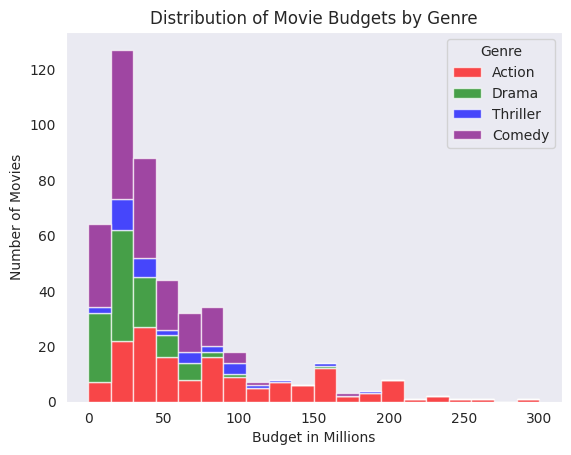

In [186]:
# Define colors for each genre
colors = ['red', 'green', 'blue', 'purple']
labels = ['Action', 'Drama', 'Thriller', 'Comedy']

# Data for each genre
data = [
    rating[rating.Genre == 'Action'].BudgetMillions,
    rating[rating.Genre == 'Drama'].BudgetMillions,
    rating[rating.Genre == 'Thriller'].BudgetMillions,
    rating[rating.Genre == 'Comedy'].BudgetMillions
]

# Plot stacked histogram
plt.hist(data, bins=20, stacked=True, color=colors, label=labels, alpha=0.7)

# Add labels and title
plt.xlabel('Budget in Millions')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Budgets by Genre')

plt.legend(title='Genre')
plt.show()

### Creating Box Plot, Violin Plot, and Facet Grid  with Seaborn

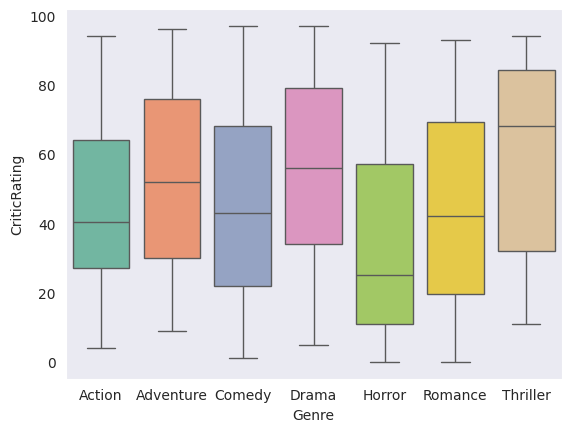

In [190]:
# Box Plot -
box = sns.boxplot(data=rating, x='Genre', y='CriticRating', palette='Set2')

plt.show()

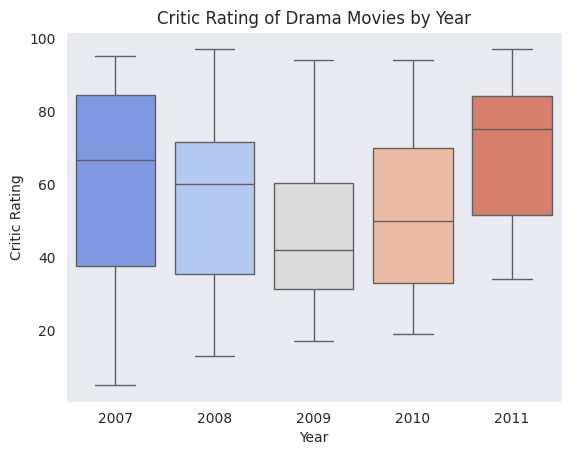

In [194]:
box = sns.boxplot(data=rating[rating.Genre == 'Drama'], x='Year', y='CriticRating', palette='coolwarm')

plt.xlabel('Year')
plt.ylabel('Critic Rating')
plt.title('Critic Rating of Drama Movies by Year')

plt.show()

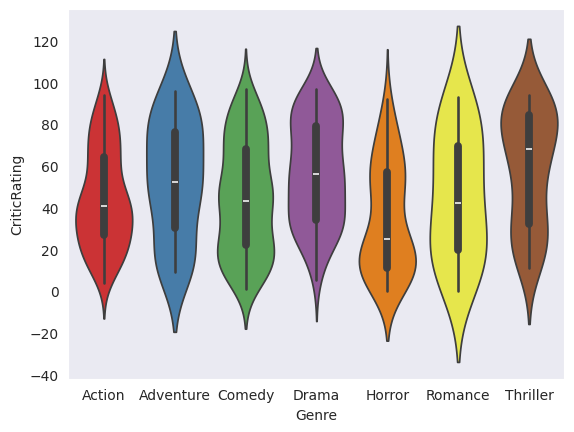

In [193]:
# Violin Plot
voilin = sns.violinplot(data=rating, x='Genre', y='CriticRating', palette='Set1')

plt.show()

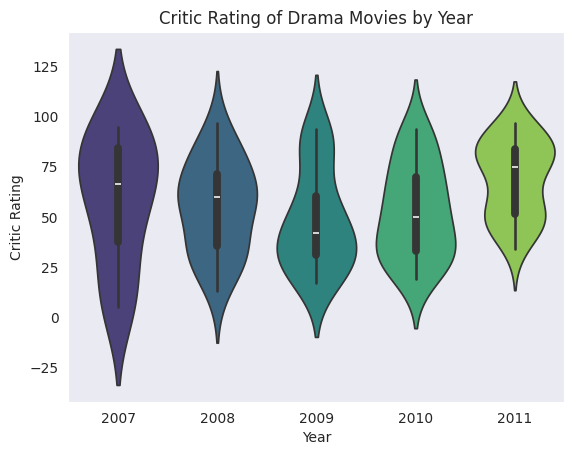

In [195]:
voilin = sns.violinplot(data=rating[rating.Genre == 'Drama'], x='Year', y='CriticRating', palette='viridis')

plt.xlabel('Year')
plt.ylabel('Critic Rating')
plt.title('Critic Rating of Drama Movies by Year')

plt.show()

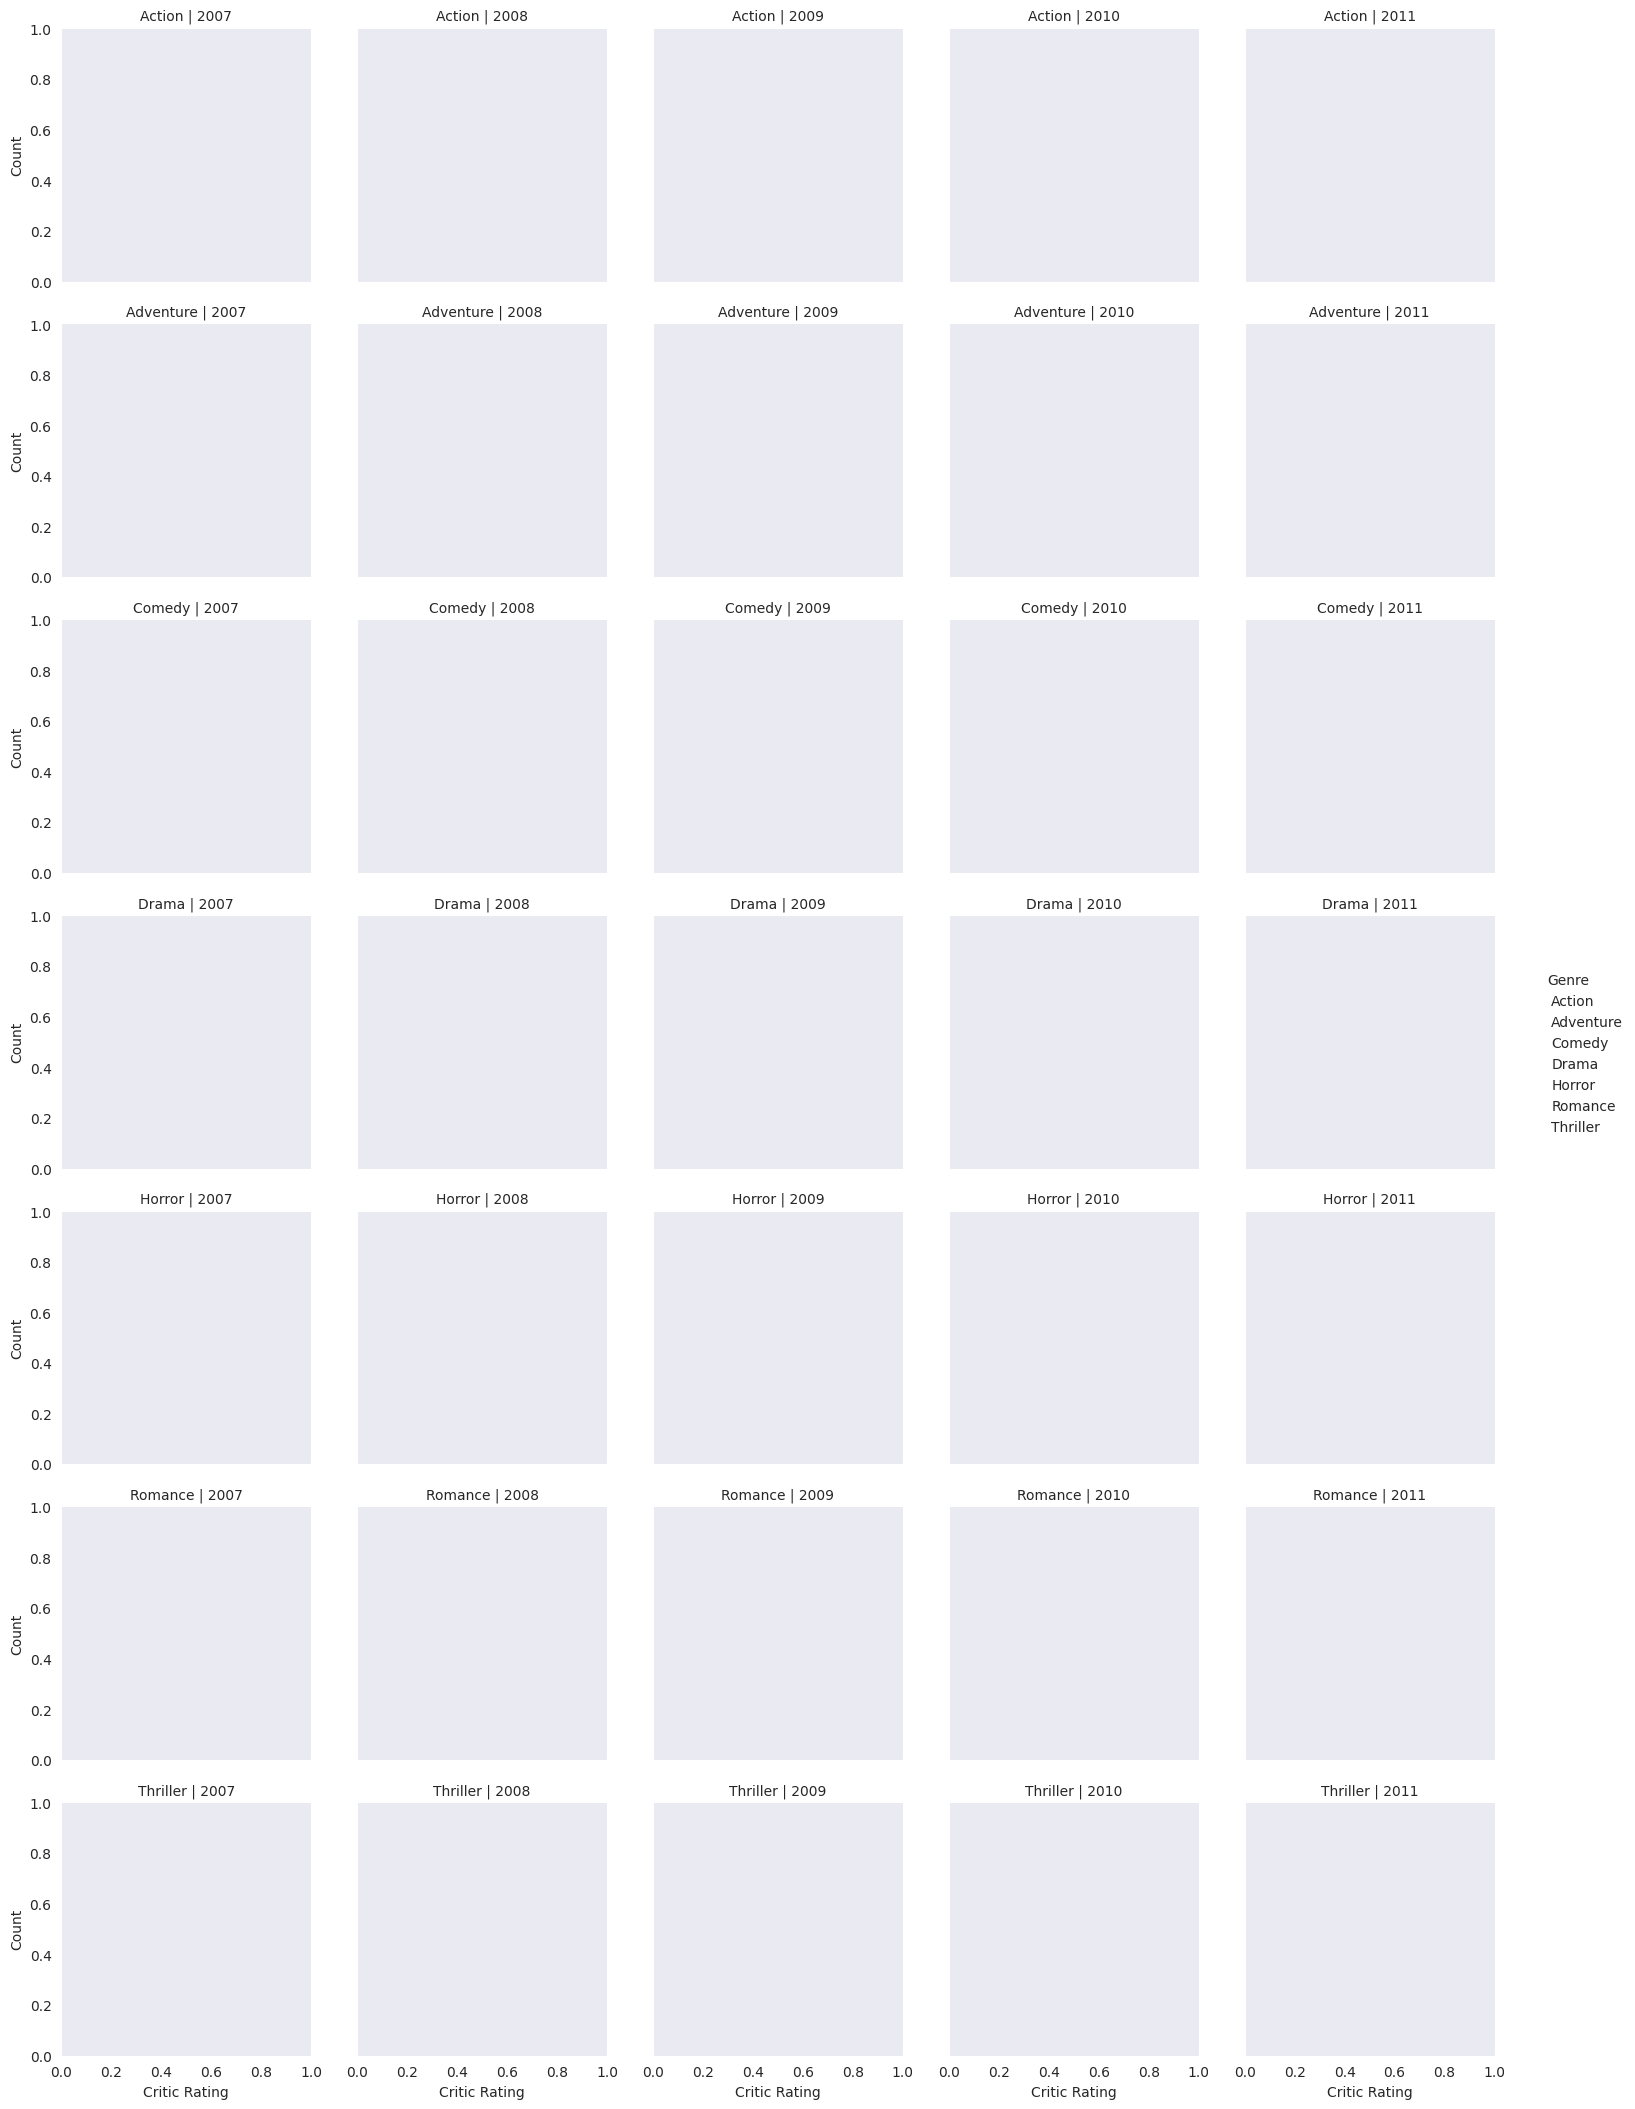

In [197]:
# Creating a Facet grid, kind of subplots in Seaborn

facet = sns.FacetGrid(rating, row='Genre', col='Year', hue='Genre')

# Add legend and adjust layout
facet.add_legend()
facet.set_axis_labels('Critic Rating', 'Count')
facet.set_titles(col_template='{col_name}', row_template='{row_name}')

# Show the plot
plt.show()

###Lets now mapped Scatter Plots, Line Plots in the Facet Grid

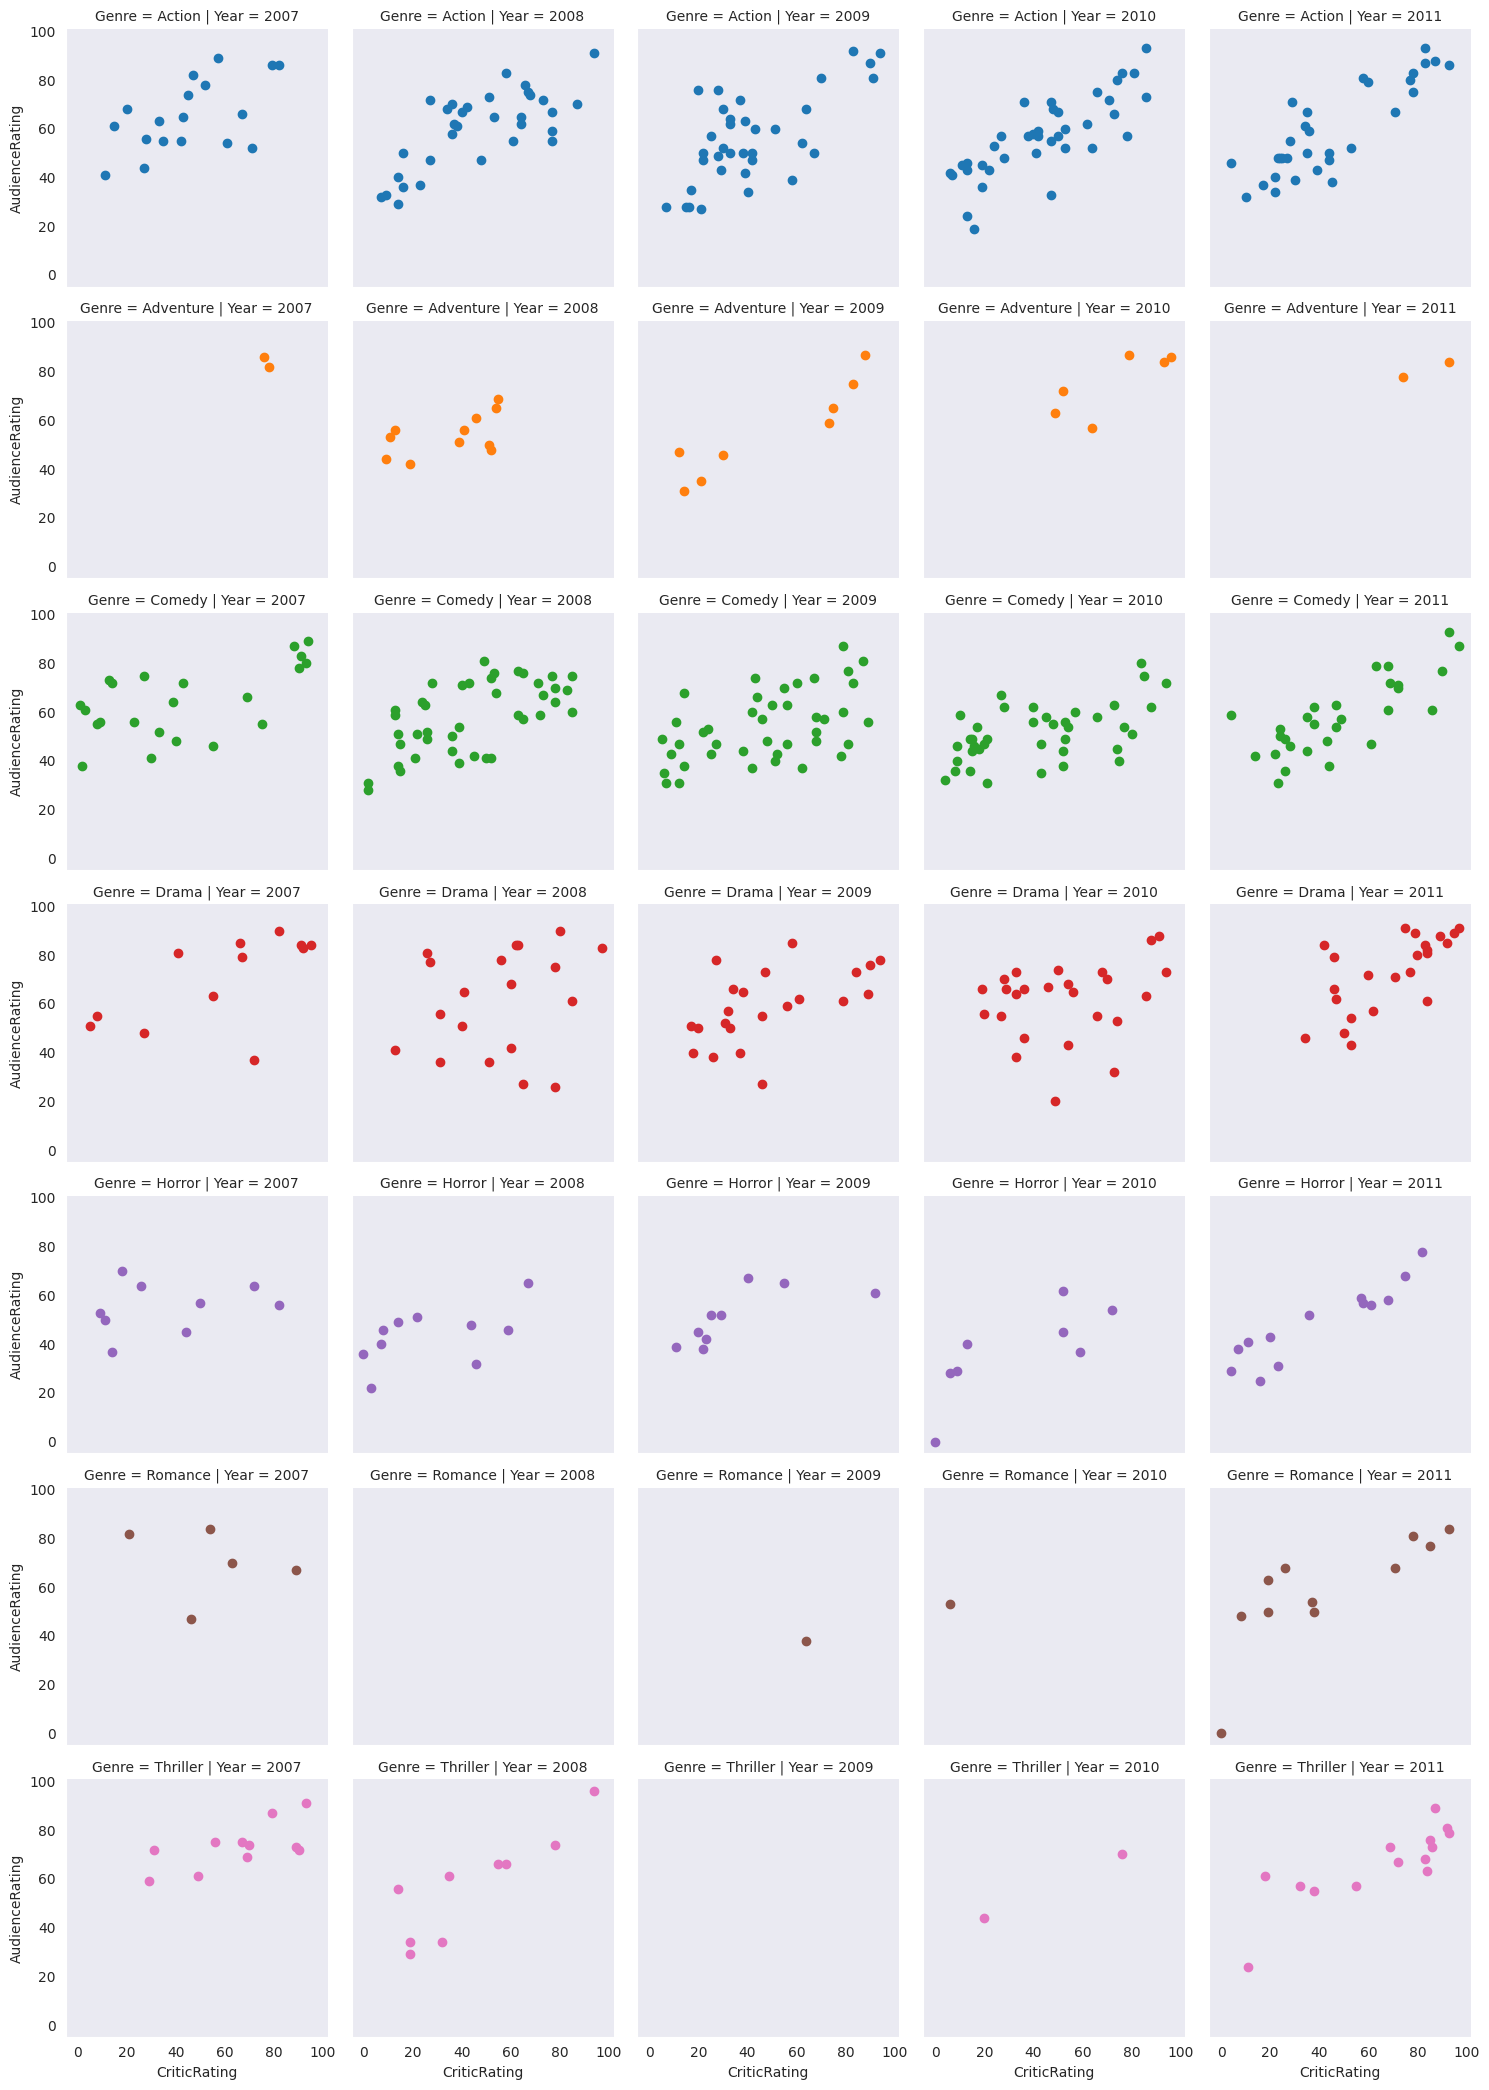

In [199]:
# Scatterplots are mapped in facetgrid
scat =sns.FacetGrid (rating, row = 'Genre', col = 'Year', hue = 'Genre')
scat = scat.map(plt.scatter, 'CriticRating', 'AudienceRating')

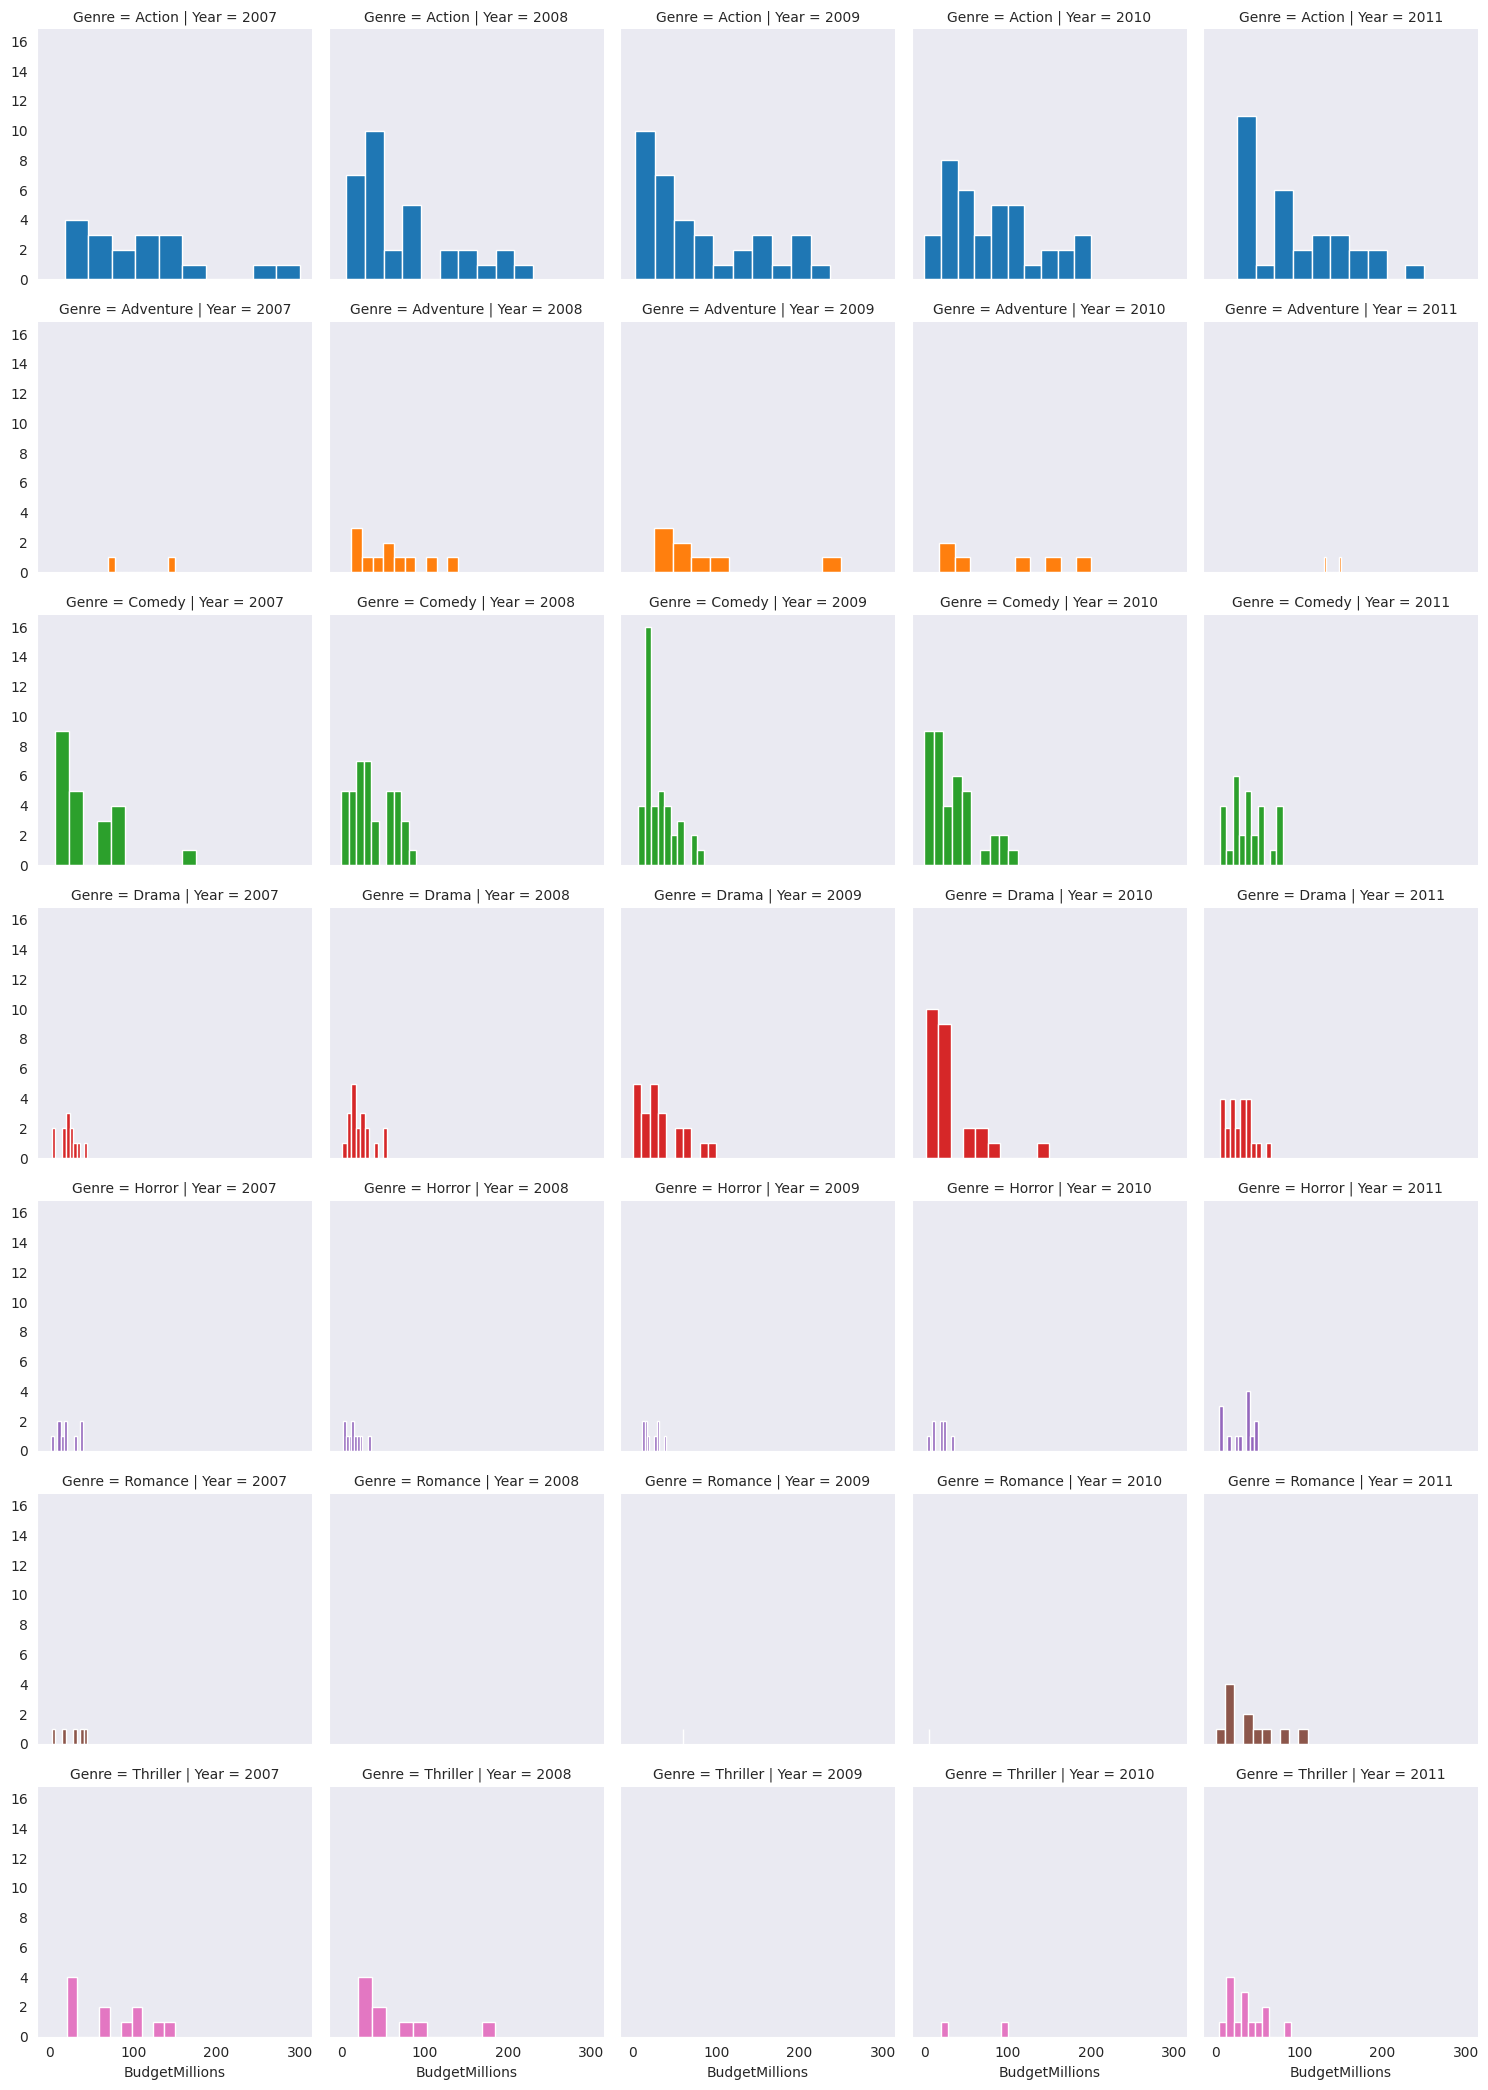

In [200]:
# Line Plot are mapped in facet grid
line = sns.FacetGrid (rating, row = 'Genre', col = 'Year', hue = 'Genre')
line = line.map(plt.hist, 'BudgetMillions')

### Building Dashboards (Dashboard - Combination of chats)

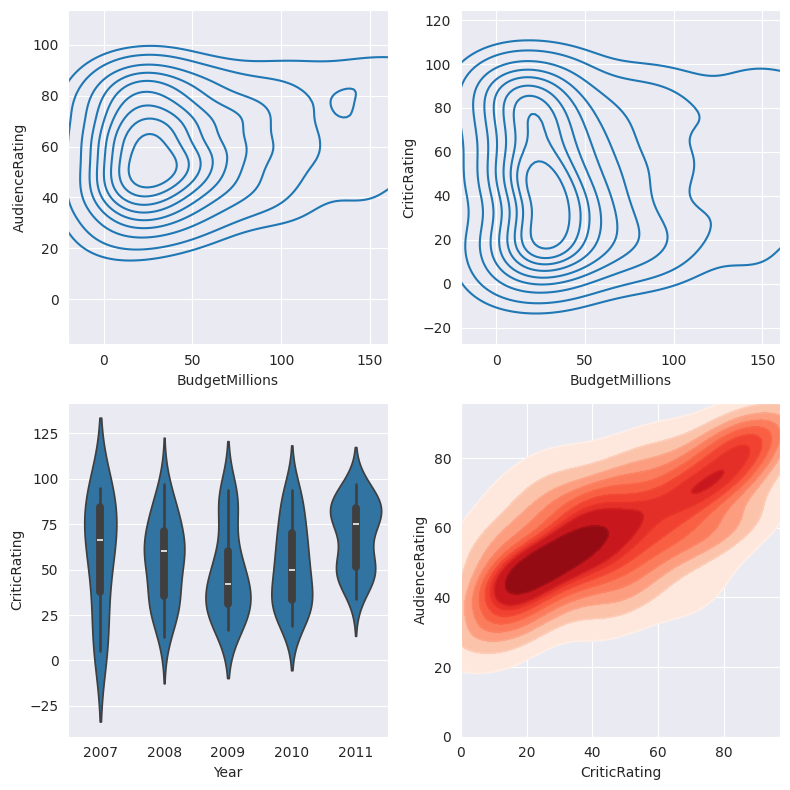

In [207]:
sns.set_style('darkgrid')
f, sub = plt.subplots(2, 2, figsize=(8, 8))

# KDE Plots
kernel1 = sns.kdeplot(x=rating.BudgetMillions, y=rating.AudienceRating, ax=sub[0, 0])
kernel1.set(xlim=(-20, 160))

kernel2 = sns.kdeplot(x=rating.BudgetMillions, y=rating.CriticRating, ax=sub[0, 1])
kernel2.set(xlim=(-20, 160))

# Violin Plot
violin = sns.violinplot(data=rating[rating.Genre == 'Drama'], x='Year', y='CriticRating', ax=sub[1, 0])

# KDE Plots with shading
kernel3 = sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=sub[1, 1])
kernel3.set(xlim=(rating.CriticRating.min(), rating.CriticRating.max()), ylim=(rating.AudienceRating.min(), rating.AudienceRating.max()))

# KDE Plot without shading
kernel4 = sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating, cmap='Reds', ax=sub[1, 1], alpha=0.5)

# Adjust subplot layout
plt.tight_layout()

plt.show()

### Here you can style your dashboard  using different color map

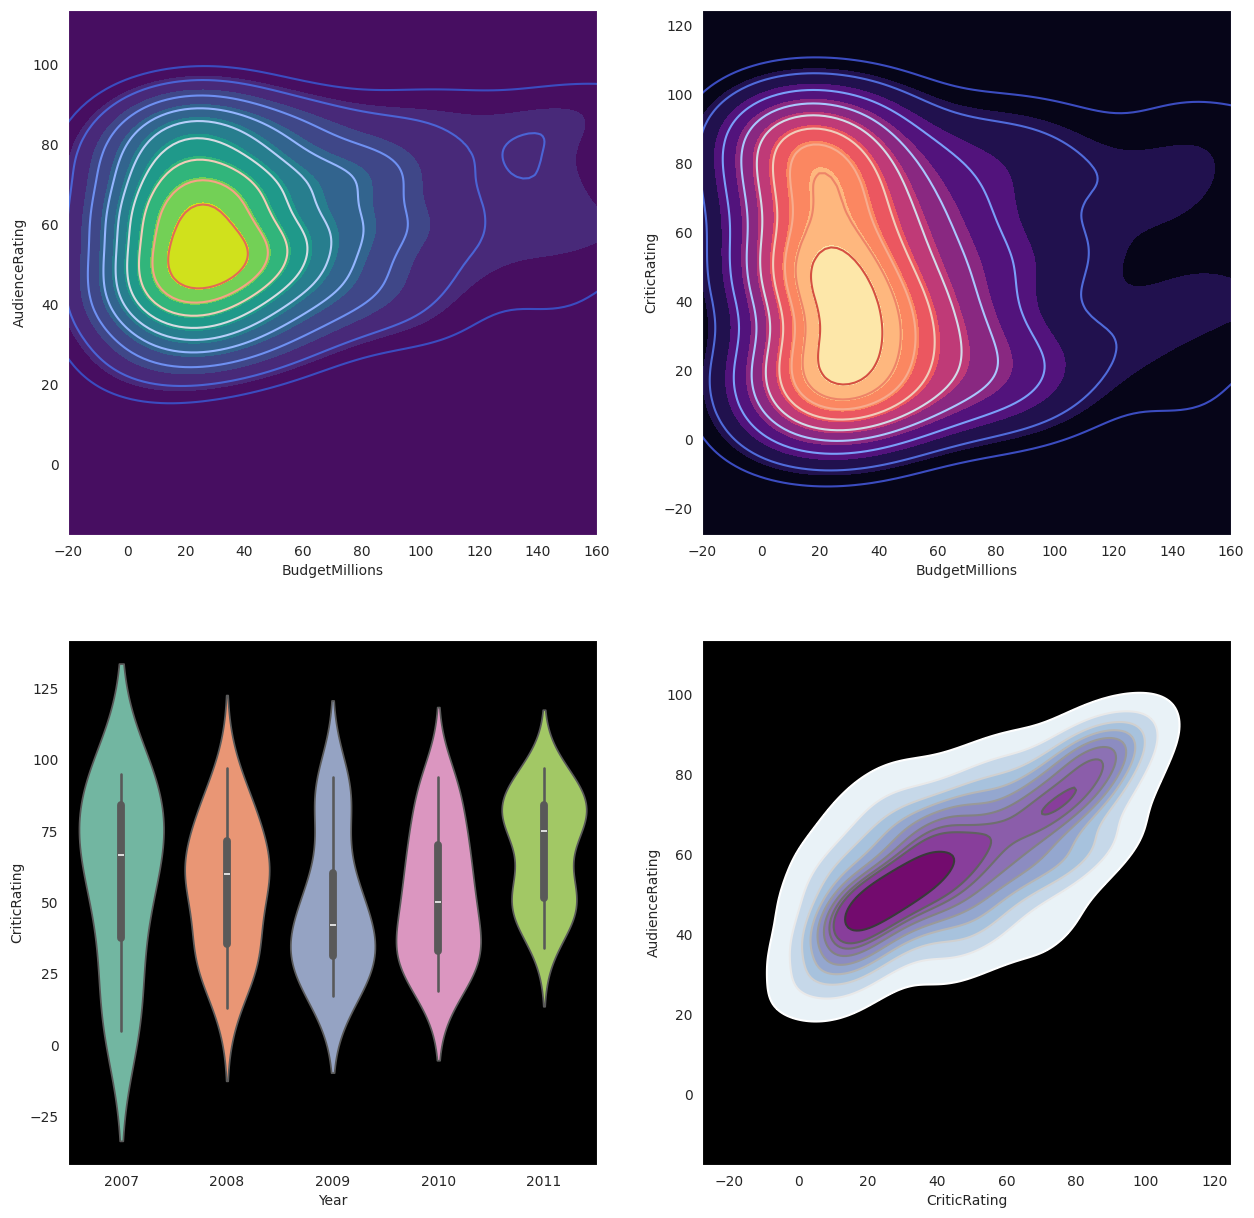

In [212]:
# Set the style and background color
sns.set_style('dark', {'axes.facecolor':'black'})

# Create subplots
f, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot [0,0]
sns.kdeplot(x=rating.BudgetMillions, y=rating.AudienceRating, shade=True, shade_lowest=True, ax=axes[0, 0], cmap='viridis')
sns.kdeplot(x=rating.BudgetMillions, y=rating.AudienceRating, cmap='coolwarm', ax=axes[0, 0])

# Plot [0,1]
sns.kdeplot(x=rating.BudgetMillions, y=rating.CriticRating, shade=True, shade_lowest=True, cmap='magma', ax=axes[0, 1])
sns.kdeplot(x=rating.BudgetMillions, y=rating.CriticRating, cmap='coolwarm', ax=axes[0, 1])

# Plot [1,0]
sns.violinplot(data=rating[rating.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1, 0], palette='Set2')

# Plot [1,1]
sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating, shade=True, shade_lowest=False, cmap='BuPu', ax=axes[1, 1])
sns.kdeplot(x=rating.CriticRating, y=rating.AudienceRating, cmap='Greys', ax=axes[1, 1])

# Set axis limits
axes[0, 0].set_xlim(-20, 160)
axes[0, 1].set_xlim(-20, 160)

plt.show()

## Completion of Movies Rating Analysis Project
###Key Learnings:
1. Category Data Type: Efficiently manage categorical data.
2. Joint Plots: Visualize relationships and distributions of two variables.
3. Histograms: Display frequency distribution of movie ratings.
4. Stacked Histograms: Compare rating distributions across categories.
5. KDE Plots: Estimate and visualize density of rating distributions.
6. Subplots: Compare multiple visualizations in one figure.
7. Violin Plots: Show distribution and spread of ratings across categories.
8. Facet Grid: Create subplots for detailed comparison based on categories.
9. Dashboards: Integrate visualizations for interactive exploration of data.

In [214]:
#thank you for visiting here!
#rohanwaghmare